In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA, TruncatedSVD
from scipy.spatial.distance import euclidean, cityblock

In [3]:
df = pd.read_csv('df_model2.csv')
df = df.drop('Unnamed: 0', axis=1)
df.head(10)

,date,brand_name,channel,cost,buy_now,shop_now,limited_offer,add_cart,use_code,free_shipping,today_only,free_delivery,extra_discount,voucher_code,last_chance,up_to,%_off,is_success
0,2019-11-24,Enfa,Lazada,24.180000,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2019-11-25,Enfa,Lazada,23.700001,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2019-11-26,Enfa,Lazada,23.910000,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2019-11-24,Enfa,Lazada,18.559999,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2019-11-25,Enfa,Lazada,21.250000,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5,2019-11-26,Enfa,Lazada,19.620001,1,0,0,0,0,0,0,0,0,0,0,0,0,0
6,2019-11-24,Enfa,Lazada,6.510000,1,0,0,0,0,0,0,0,0,0,0,0,0,0
7,2019-11-25,Enfa,Lazada,5.150000,1,0,0,0,0,0,0,0,0,0,0,0,0,0
8,2019-11-26,Enfa,Lazada,6.440000,1,0,0,0,0,0,0,0,0,0,0,0,0,0
9,2019-11-24,Enfa,Lazada,13.860000,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
df.shape

(11211, 18)

In [12]:
df.cost.describe()

count    11211.000000
mean        46.855656
std        116.112668
min          0.000000
25%          2.290000
50%         11.770000
75%         43.004999
max       3676.370117
Name: cost, dtype: float64

C:\Users\Matthew Romero\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cost', ylabel='Density'>

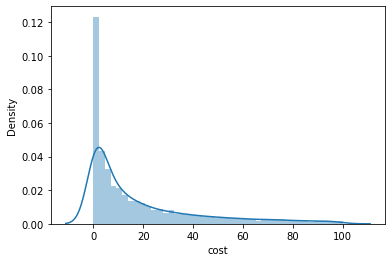

In [15]:
sns.distplot(df[df['cost']<100].cost)

C:\Users\Matthew Romero\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cost', ylabel='Density'>

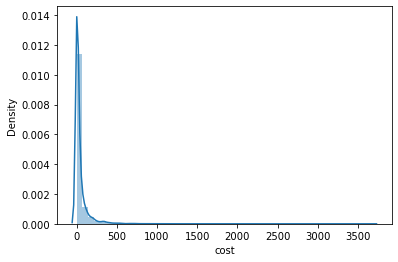

In [9]:
sns.distplot(df.cost)

,cost,buy_now,shop_now,limited_offer,add_cart,use_code,free_shipping,today_only,free_delivery,extra_discount,voucher_code,last_chance,up_to,%_off,is_success
0,24.180000,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,23.700001,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,23.910000,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,18.559999,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,21.250000,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11206,15.890000,1,0,0,0,0,0,0,0,0,0,0,1,1,1
11207,8.910000,1,0,0,0,0,0,0,0,0,0,0,1,1,1
11208,0.280000,1,0,0,0,0,0,0,0,0,0,0,1,1,0
11209,7.990000,1,0,0,0,0,0,0,0,0,0,0,1,1,0


In [22]:
kmeans_fb = KMeans(n_clusters=3, random_state=1337)
y = kmeans_fb.fit_predict(df.iloc[:, 3:])

In [27]:
set(y)

{0, 1, 2}